## Time Series


In [1]:
import numpy as np
temps = np.loadtxt("https://raw.githubusercontent.com/gagolews/" +
    "teaching-data/master/marek/spokane_temperature.txt")
temps[-31:]  # December 2021 data

array([ 11.9,   5.8,   0.6,   0.8,  -1.9,  -4.4,  -1.9,   1.4,  -1.9,
        -1.4,   3.9,   1.9,   1.9,  -0.8,  -2.5,  -3.6, -10. ,  -1.1,
        -1.7,  -5.3,  -5.3,  -0.3,   1.9,  -0.6,  -1.4,  -5. ,  -9.4,
       -12.8, -12.2, -11.4, -11.4])

In [2]:
np.quantile(temps, [0, 0.25, 0.5, 0.75, 1])

array([-26.9,   2.2,   8.6,  16.4,  33.9])

In [3]:
np.mean(temps), np.std(temps)

(8.990273958441023, 9.16204388619955)

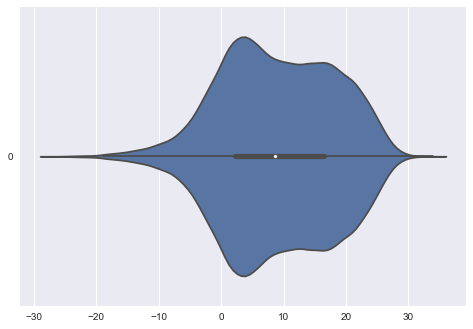

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
sns.violinplot(data=temps, orient="h")
plt.show()

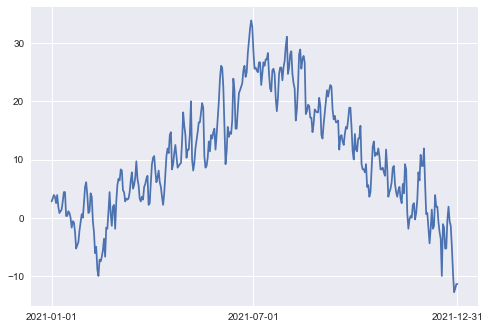

In [5]:
plt.plot(temps[-365:])
plt.xticks([0, 181, 364], ["2021-01-01", "2021-07-01", "2021-12-31"])
plt.show()

### dtype = datetime64

In [6]:
d = np.array(["1889-08-01", "1970-01-01", "2021-12-31"], dtype="datetime64")
d

array(['1889-08-01', '1970-01-01', '2021-12-31'], dtype='datetime64[D]')

In [7]:
dt = np.array(["1970-01-01T02:01:05"], dtype="datetime64")
dt

array(['1970-01-01T02:01:05'], dtype='datetime64[s]')

### Unix Epoch, 1970-01-01T00:00:00 in the UTC time zone

In [8]:
d-np.timedelta64(1, "D")  # minus 1 Day

array(['1889-07-31', '1969-12-31', '2021-12-30'], dtype='datetime64[D]')

In [9]:
dt+np.timedelta64(12, "h")  # plus 12 hours

array(['1970-01-01T14:01:05'], dtype='datetime64[s]')

In [10]:
d-dt

array([-2537748065,       -7265,  1640901535], dtype='timedelta64[s]')

In [11]:
dates = np.arange("1889-08-01", "2022-01-01", dtype="datetime64[D]")
dates[:3], dates[-3:]  # preview

(array(['1889-08-01', '1889-08-02', '1889-08-03'], dtype='datetime64[D]'),
 array(['2021-12-29', '2021-12-30', '2021-12-31'], dtype='datetime64[D]'))

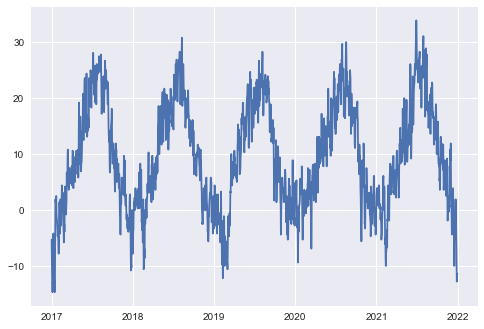

In [12]:
which = (dates >= np.datetime64("2017-01-01"))
dates5, temps5 = dates[which], temps[which]
plt.plot(dates5, temps5)
plt.show()

In [13]:
x = temps[-5:]  # last 5 days
x

array([ -9.4, -12.8, -12.2, -11.4, -11.4])

In [14]:
d = np.diff(x)
d

array([-3.4,  0.6,  0.8,  0. ])

In [15]:
np.cumsum(d)

array([ -9.4, -22.2, -34.4, -45.8, -57.2])

In [17]:
x[0] + np.append(0, np.cumsum(d))

array([ -9.4, -12.8, -12.2, -11.4, -11.4])

## Moving Averages

In [18]:
x = np.array([3, 5, 4, -3, 6, 9, 11, 7, 2])

In [19]:
from numpy.lib.stride_tricks import sliding_window_view
np.round(np.mean(sliding_window_view(x, 3), axis=-1), 2)

array([4.  , 2.  , 2.33, 4.  , 8.67, 9.  , 6.67])

In [20]:
np.round(np.mean(sliding_window_view(x, 5), axis=-1), 2)

array([3. , 4.2, 5.4, 6. , 7. ])

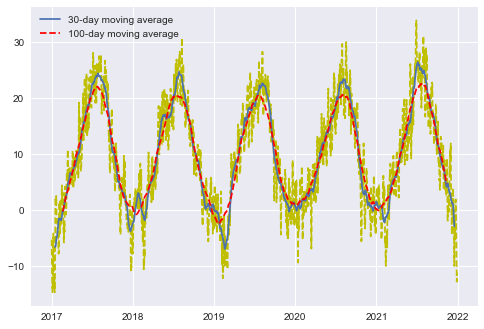

In [24]:
plt.plot(dates5, temps5, "y--")
temps5_ma30 = np.mean(sliding_window_view(temps5, 30), axis=-1)
plt.plot(dates5[15:-14], temps5_ma30, label="30-day moving average")
temps5_ma100 = np.mean(sliding_window_view(temps5, 100), axis=-1)
plt.plot(dates5[50:-49], temps5_ma100, "r--", label="100-day moving average")

plt.legend()
plt.show()